### Importing Libraries

In [ ]:
# pip install gym
#pip install pymdptoolbox

In [1]:
import gym
import numpy as np
from time import time
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv


## Frozen Lake Problem- Grid Real World Problem

In [2]:
def create_frozen_lake(num_states, holes=[], goal=None):
    # calculate the number of rows and columns in the grid
    grid_size = int(np.sqrt(num_states))
    assert grid_size**2 == num_states, "Number of states must be a perfect square"

    # create the empty grid
    grid = [["F" for c in range(grid_size)] for r in range(grid_size)]

    # add the holes to the grid
    for hole in holes:
        r, c = np.unravel_index(hole, (grid_size, grid_size))
        grid[r][c] = "H"

    # add the goal to the grid
    if goal is not None:
        r, c = np.unravel_index(goal, (grid_size, grid_size))
        grid[r][c] = "G"

    # add the starting tile to the grid
    grid[0][0] = "S"

    # flatten the grid into a single string
    desc = ["".join(row) for row in grid]

    # create the FrozenLake environment
    env = FrozenLakeEnv(desc=desc)

    return env

## Varying States 

### Value iteration as well as policy iteration for Fronen Lake -  Grid Problem

In [3]:

time_took_list=[]
iter_took_list=[]
all_states=[16,81,144,256,400,625]
for states_ in all_states:
    print("Total states :",states_)
    env = create_frozen_lake(num_states=states_, holes=[15], goal=states_-2)
    # create the FrozenLake environment
    # env = gym.make('FrozenLake-v1')

    # env.observation_space.n=11

    # set up the MDP
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    P = np.zeros((num_actions, num_states, num_states))
    R = np.zeros((num_actions, num_states, num_states))
    for s in range(num_states):
        for a in range(num_actions):
            for prob, next_state, reward, done in env.P[s][a]:
                P[a, s, next_state] += prob
                R[a, s, next_state] += prob * reward

    # define the discount factor
    discount_factor = 0.9

    # solve the MDP using value iteration
    start_time = time()
    
    from mdptoolbox import mdp
    vi = mdp.ValueIteration(P, R, discount_factor)
    vi.run()
    vi_time = time() - start_time

    # solve the MDP using policy iteration
    start_time = time()
    pi = mdp.PolicyIteration(P, R, discount_factor)
    pi.run()
    pi_time = time() - start_time

    # print the results
    print(f"Value Iteration: {vi.policy}, Time: {vi_time:.4f}")
    print(f"Policy Iteration: {pi.policy}, Time: {pi_time:.4f}")



    # print the number of iterations taken by each algorithm
    print(f"Value Iteration took {vi.iter} iterations")
    print(f"Policy Iteration took {pi.iter} iterations")
    
    time_took_list.append([vi_time,pi_time])
    iter_took_list.append([vi.iter,pi.iter])
    print("\n\n")


Total states : 16
Value Iteration: (1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 0, 0), Time: 0.0517
Policy Iteration: (1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 0, 0), Time: 0.0036
Value Iteration took 21 iterations
Policy Iteration took 5 iterations



Total states : 81
Value Iteration: (1, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1), Time: 0.0012
Policy Iteration: (1, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1), Time: 0.3863
Value Iteration took 25 iterations
Policy Iteration took 9 iterations



Total states : 144
Value Iteration: (1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 

### Time vs. States

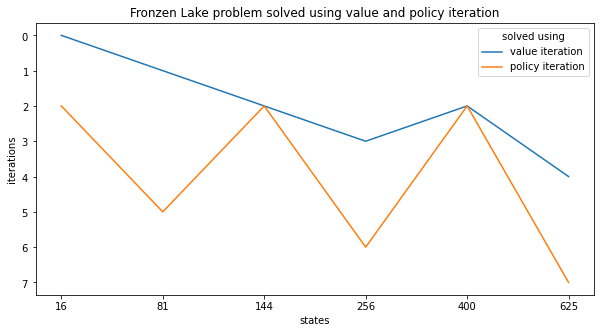

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd



hue_list= len(all_states)*['value iteration']+len(all_states)*['policy iteration']
df_time=pd.DataFrame(np.c_[ all_states+all_states  ,np.array(iter_took_list).flatten(),hue_list])
df_time.columns=["states","iterations","solved using"]
plt.figure(figsize=(10,5))
# Create the plot with hue
sns.lineplot(x="states", y="iterations", hue="solved using", data=df_time)

# Add labels and title
plt.xlabel('states')
plt.ylabel('iterations')
plt.title('Fronzen Lake problem solved using value and policy iteration')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1,1))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
# Show the plot
plt.show()


### Iterations for convergance vs States

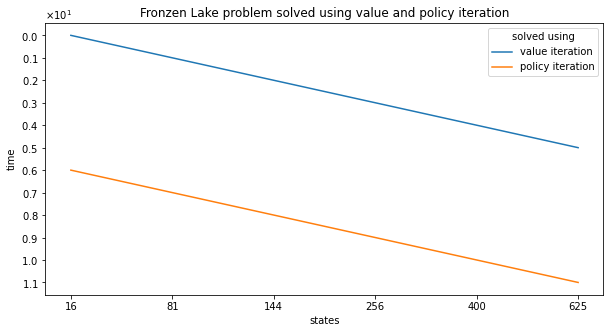

In [5]:


hue_list= len(all_states)*['value iteration']+len(all_states)*['policy iteration']
df_time=pd.DataFrame(np.c_[ all_states+all_states  ,np.array(time_took_list).flatten(),hue_list])
df_time.columns=["states","time","solved using"]
plt.figure(figsize=(10,5))
# Create the plot with hue
sns.lineplot(x="states", y="time", hue="solved using", data=df_time)

# Add labels and title
plt.xlabel('states')
plt.ylabel('time')
plt.title('Fronzen Lake problem solved using value and policy iteration')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1,1))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
# Show the plot
plt.show()


### Reinforcement learning a for Frozen Lake -  Grid Problem

In [6]:
import numpy as np
import gym
import time
from IPython.display import clear_output
from time import time


time_took_list=[]
rewards_list=[]
all_states=[16,81,144,256,400,625]
for states_ in all_states:
    start_time = time()
    
    print("Total states :",states_)

    env = create_frozen_lake(num_states=states_, holes=[15], goal=states_-2) #gym.make("FrozenLake-v1")

    # Hyperparameters
    alpha = 0.1  # Learning rate
    gamma = 0.99  # Discount factor
    epsilon = 1  # Exploration rate
    max_epsilon = 1  # Maximum exploration rate
    min_epsilon = 0.01  # Minimum exploration rate
    decay_rate = 0.001  # Exponential decay rate for exploration probability

    # Initialize Q-table
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    q_table = np.zeros((num_states, num_actions))


    # Training parameters
    num_episodes = 1000  # Number of episodes to train
    max_steps = 100  # Maximum steps per episode

    # Variables to store rewards and steps
    rewards = []
    steps = []

    # Training loop
    for episode in range(num_episodes):
        state = env.reset()
        state=state[0]
        done = False
        total_reward = 0
        step = 0

        while not done and step < max_steps:
            # Choose an action using epsilon-greedy policy
            if np.random.uniform(0, 1) > epsilon:
                action = np.argmax(q_table[state, :])
            else:
                action = env.action_space.sample()

            # Perform the action and observe the next state and reward
            next_state, reward, terminated, truncated , info = env.step(action)


            # Update the Q-table
            q_table[state, action] = q_table[state, action] + alpha * (
                reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action]
            )

            # Update the state, reward, and step count
            state = next_state
            total_reward += reward
            step += 1

        # Decay epsilon
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

        # Store rewards and steps
        rewards.append(total_reward)
        steps.append(step)
    
    pi_time = time() - start_time
        
    time_took_list.append(pi_time)
    rewards_list.append(np.mean(rewards))
    
    print(f"Average reward over {num_episodes} episodes: {np.mean(rewards)}")


Total states : 16
Average reward over 1000 episodes: 0.849
Total states : 81
Average reward over 1000 episodes: 0.459
Total states : 144
Average reward over 1000 episodes: 0.084
Total states : 256
Average reward over 1000 episodes: 0.0
Total states : 400
Average reward over 1000 episodes: 0.0
Total states : 625
Average reward over 1000 episodes: 0.0


In [7]:
df_time

,states,time,solved using
0,16,0.051679372787475586,value iteration
1,81,0.0035839080810546875,value iteration
2,144,0.0012371540069580078,value iteration
3,256,0.38626813888549805,value iteration
4,400,0.0038352012634277344,value iteration
5,625,2.065455675125122,value iteration
6,16,0.011919736862182617,policy iteration
7,81,10.74523377418518,policy iteration
8,144,0.01432657241821289,policy iteration
9,256,4.251410007476807,policy iteration


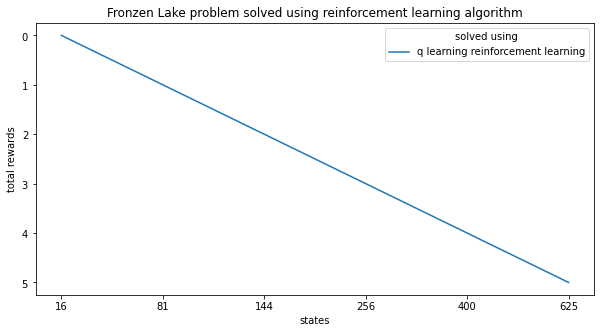

In [8]:


hue_list= len(all_states)*['q learning reinforcement learning']
df_time=pd.DataFrame(np.c_[ all_states  ,np.array(time_took_list).flatten(),hue_list])
df_time.columns=["states","total rewards","solved using"]
plt.figure(figsize=(10,5))
# Create the plot with hue
sns.lineplot(x="states", y="total rewards", hue="solved using", data=df_time)

# Add labels and title
plt.xlabel('states')
plt.ylabel('total rewards')
plt.title('Fronzen Lake problem solved using reinforcement learning algorithm')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1,1))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
# Show the plot
plt.show()


## MountainCar - Non Grid Problem

### Value iteration as well as policy iteration for MountainCar - Non Grid Problem

In [10]:
import gym
import numpy as np

# Create the MountainCar-v0 environment
env = gym.make('MountainCar-v0')

# Define the number of bins for discretizing the state space
num_bins = [20, 20]

# Get the number of states and actions
num_states = np.prod(num_bins)
num_actions = env.action_space.n

# Define the reward function
def reward_func(state):
    position, velocity = state
    if position >= 0.5:
        return 0
    else:
        return -1

# Define the state discretization function
def discretize_state(state):
    state_min = env.observation_space.low
    state_max = env.observation_space.high
    state_bins = [(state_max[i] - state_min[i]) / num_bins[i] for i in range(len(state_min))]
    return tuple(int((state[i] - state_min[i]) / state_bins[i]) for i in range(len(state_min)))

# Create the transition probability matrix and reward vector
P = np.zeros((num_states, num_actions, num_states))
R = np.zeros((num_states, num_actions, num_states))
env.reset()


for state in range(num_states):
    state_tuple = np.unravel_index(state, num_bins)
    env_state = [state_tuple[0]/num_bins[0], 0, state_tuple[1]/num_bins[1], 0]
    env.state = env_state  # Set the current state
    for action in range(num_actions):
        next_env_state, reward, done, _,_ = env.step(action)
        next_state_tuple = discretize_state(next_env_state)
        next_state = np.ravel_multi_index(next_state_tuple, num_bins)
        P[state, action, next_state] = 1
        R[state, action, next_state] = reward_func(next_env_state)
        env.state = env_state  # Reset to the current state

# Define the discount factor
discount = 0.99

# Solve the MDP using value iteration
V = np.zeros(num_states)
epsilon = 0.001
delta = epsilon * (1 - discount) / discount

num_iter=0
while True:
    num_iter+=1
    Q = np.sum(P * (R + discount * V), axis=2)
    V_new = np.max(Q, axis=1)
    if np.max(np.abs(V - V_new)) < delta:
        break
    V = V_new
policy = np.argmax(Q, axis=1)
print("Value Iteration")
print("Iterations: ", num_iter)

# Solve the MDP using policy iteration
policy = np.zeros(num_states, dtype=int)
max_iter = 1000
for i in range(max_iter):
    V = np.zeros(num_states)
    for j in range(100):
        Q = np.sum(P * (R + discount * V), axis=2)
        V_new = Q[np.arange(num_states), policy]
        if np.max(np.abs(V - V_new)) < delta:
            break
        V = V_new
    Q = np.sum(P * (R + discount * V), axis=2)
    policy_new = np.argmax(Q, axis=1)
    if np.array_equal(policy, policy_new):
        break
    policy = policy_new
print("Policy Iteration")
print("Iterations: ", i+1)


Value Iteration
Iterations:  1146
Policy Iteration
Iterations:  1


### Reinforcement learning for MountainCar - Non Grid Problem

In [11]:
import gym
import numpy as np

env = gym.make('MountainCar-v0')

# Set up the Q-learning table
num_states = 40
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_states, num_actions))

# Set the learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.999
min_epsilon = 0.01

# Discretize the state space
def discretize_state(state):
    if isinstance(state, tuple):
        state = state[0]
    position_bins = np.linspace(-1.2, 0.6, num_states)
    velocity_bins = np.linspace(-0.07, 0.07, num_states)
    position_idx = np.digitize(state[0], position_bins) - 1
    velocity_idx = np.digitize(state[1], velocity_bins) - 1
    return position_idx, velocity_idx
# Run the Q-learning algorithm
for episode in range(10000):
    state = env.reset()
    position, velocity = discretize_state(state)
    done = False
    while not done:
        # Choose an action
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[position, velocity])
        # Take the action and observe the next state and reward
        next_state, reward, done, _,_ = env.step(action)
        next_position, next_velocity = discretize_state(next_state)
        # Update the Q-value
        q_table[position, velocity, action] = (1 - alpha) * q_table[position, velocity, action] + \
            alpha * (reward + gamma * np.max(q_table[next_position, next_velocity]))
        # Update the state and epsilon
        position, velocity = next_position, next_velocity
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Evaluate the agent's performance
num_episodes = 100
total_reward = 0
for episode in range(num_episodes):
    state = env.reset()
    position, velocity = discretize_state(state)
    done = False
    episode_reward = 0
    while not done:
        action = np.argmax(q_table[position, velocity])
        next_state, reward, done, _,_ = env.step(action)
        next_position, next_velocity = discretize_state(next_state)
        position, velocity = next_position, next_velocity
        episode_reward += reward
    total_reward += episode_reward
avg_reward = total_reward / num_episodes
print("Average reward over {} episodes: {}".format(num_episodes, avg_reward))


Average reward over 100 episodes: -141.96
